### Problem 3

Similar to 2, I only estimate beta with bias = 0, in all the tests below, I use
- warmup of learning rate
- learning rate decay for non-adaptive methods

In [1]:
from hw_1_3 import *

In [2]:
gd_loss = gd(X, Y_gt, 0.01, d)

vanilla GD ended with L_1 diff as:  41.974064537759176
Total time: 95.37802290916443 total steps: 10001


In [3]:
nag_loss = nag(X, Y_gt, 0.01, d)

NAG ended with L_1 diff as:  1.1847692899228934
Total time: 95.65646767616272 total steps: 10001


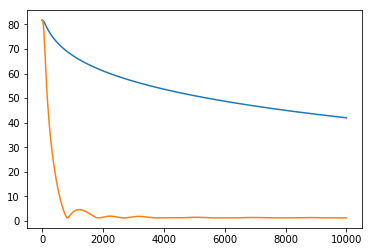

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(gd_loss)
plt.plot(nag_loss)
plt.show()

We see from above plot that
- NAG converges faster
- NAG yields better results at termination time
- L_1 loss from NAG shows disturbance
    - such disturbance goes smaller as time goes

SGD ended with L_1 diff as:  9.078735909998375
Total time: 2.2921721935272217
AdaGrad ended with L_1 diff as:  38.271510161068385
Total time: 2.467775821685791
RMSprop ended with L_1 diff as:  9.920557393271283
Total time: 2.5766680240631104
Adam ended with L_1 diff as:  8.554026095617289
Total time: 3.440570831298828


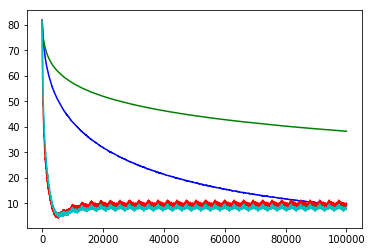

SGD ended with L_1 diff as:  9.1073082329506
Total time: 3.6313655376434326
AdaGrad ended with L_1 diff as:  33.211995653131595
Total time: 4.092636346817017
RMSprop ended with L_1 diff as:  7.017677210336984
Total time: 4.405670404434204
Adam ended with L_1 diff as:  6.366707843919753
Total time: 5.740947246551514


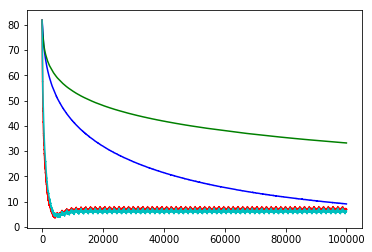

SGD ended with L_1 diff as:  9.118820163648914
Total time: 4.524576425552368
AdaGrad ended with L_1 diff as:  28.478297905035344
Total time: 5.001366138458252
RMSprop ended with L_1 diff as:  5.142830427097949
Total time: 5.725455045700073
Adam ended with L_1 diff as:  4.828163105280646
Total time: 6.450718402862549


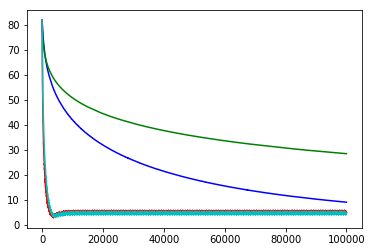

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
for batch_size in [32, 64, 128]:
    sgd_loss = sgd(X, Y_gt, 0.01, d, batch_size)
    adagrad_loss = adagrad(X, Y_gt, 0.01, d, 1e-8, batch_size)
    rmsprop_loss = rmsprop(X, Y_gt, 0.01, d, 1e-8, batch_size)
    adam_loss = adam(X, Y_gt, 0.01, d, 0.9, 0.999, 1e-8, batch_size)
    plt.clf()
    plt.plot(sgd_loss, color='b')
    plt.plot(adagrad_loss, color='g')
    plt.plot(rmsprop_loss, color='r')
    plt.plot(adam_loss, color='c')
    plt.show()

We conclude from above plot that
- for convergence speed: AdaGrad < SGD < RMSprop = Adam
    - only in this specific setting
    - Adam is slightly better than RMSprop
- AdaGrad does suffer from gradient vanishing
- generally speaking, all algorithms performs better under larger batch size
- smaller batch size causes disturbance in L_1 loss after convergence of  RMSprop and Adam
    - with batch size grows, such disturbance gets smaller
- the gap between final result of SGD and (Adam or RMSprop) goes larger for larger batch size

In [5]:
np.random.seed(1234)
sparse_rate = 0.3
M = np.random.uniform(size=(n,d)) < sparse_rate
X[M] = 0.

SGD ended with L_1 diff as:  57.632316453093125
Total time: 2.3288872241973877
AdaGrad ended with L_1 diff as:  58.19594285986657
Total time: 2.5478529930114746
RMSprop ended with L_1 diff as:  55.99136106204123
Total time: 2.5994865894317627
Adam ended with L_1 diff as:  56.3426881860322
Total time: 3.394258737564087


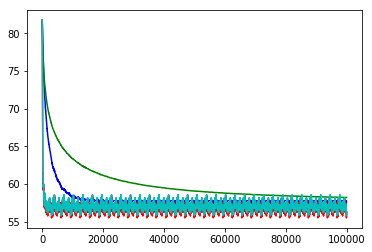

SGD ended with L_1 diff as:  57.67349901283355
Total time: 3.449314594268799
AdaGrad ended with L_1 diff as:  57.8394283059836
Total time: 3.8547658920288086
RMSprop ended with L_1 diff as:  56.42375021776389
Total time: 4.014986753463745
Adam ended with L_1 diff as:  56.52985481583919
Total time: 5.402547359466553


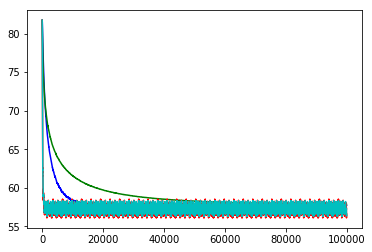

SGD ended with L_1 diff as:  57.686745096982406
Total time: 4.425594806671143
AdaGrad ended with L_1 diff as:  57.721934437618785
Total time: 4.706300497055054
RMSprop ended with L_1 diff as:  56.77692434598791
Total time: 4.892935276031494
Adam ended with L_1 diff as:  56.79963509069181
Total time: 6.076617002487183


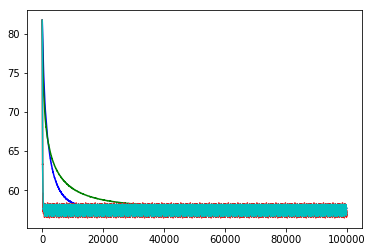

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
for batch_size in [32, 64, 128]:
    sgd_loss = sgd(X, Y_gt, 0.01, d, batch_size)
    adagrad_loss = adagrad(X, Y_gt, 0.01, d, 1e-8, batch_size)
    rmsprop_loss = rmsprop(X, Y_gt, 0.01, d, 1e-8, batch_size)
    adam_loss = adam(X, Y_gt, 0.01, d, 0.9, 0.999, 1e-8, batch_size)
    plt.clf()
    plt.plot(sgd_loss, color='b')
    plt.plot(adagrad_loss, color='g')
    plt.plot(rmsprop_loss, color='r')
    plt.plot(adam_loss, color='c')
    plt.show()

We can also derive conclusions similar to (2), besides
- variation in loss gets larger in sparse cases
- all algorithm hits a limit sooner or later
    - such limit is irrelivant to batch size, thus an inherent limit in this problem